# filters

/Users/ytcheng/ciber/python/SED/sed_tools.py:22: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(filtdir + 'Hband_trans_digitize.txt', dtype=None, delimiter=',')


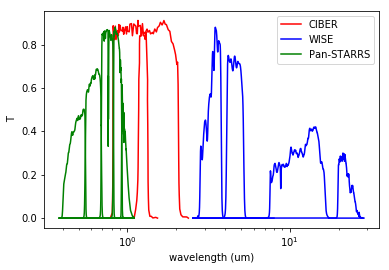

In [1]:
# plot the filters
from sed_tools import *
ciber_bands = ['I','H']
wise_bands = ['w1','w2','w3','w4']
panstarrs_bands = ['g','r','i','z','y']

plt.figure()
for band in ciber_bands:
    wl_arr,T_arr = ciber_filter(band)
    plt.plot(wl_arr,T_arr,'r', label = 'CIBER')
for band in wise_bands:
    wl_arr,T_arr = wise_filter(band)
    plt.plot(wl_arr,T_arr,'b', label = 'WISE')
for band in panstarrs_bands:
    wl_arr,T_arr = panstarrs_filter(band)
    plt.plot(wl_arr,T_arr,'g',label = 'Pan-STARRS')

plt.xscale('log')
plt.xlabel('wavelength (um)')
plt.ylabel('T')
plt.legend(loc = 0)

# LEPHARE library

Text(0,0.5,'$F_\\lambda$')

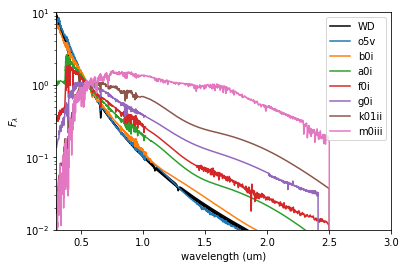

In [2]:
# some star SED
from sed_tools import *
from pathlib import Path

strlibdir = '/Users/ytcheng/ciber/lephare/lephare_dev/sed/STAR/'

plt.figure()
# WD lib
pathlist = Path(strlibdir + 'WD/').glob('*.sed')
for path in pathlist:
    wl_arr, f_arr = load_sed(str(path), interp = False)
    plt.plot(wl_arr,f_arr,'k',label = 'WD')

# PICKLES lib
name_arr = ['o5v','b0i','a0i','f0i','g0i','k01ii','m0iii']
for name in name_arr:
    wl_arr, f_arr = load_sed(strlibdir + 'PICKLES/' + name + '.sed', interp = False)
    plt.plot(wl_arr,f_arr,label = name)
plt.yscale('log')
plt.legend(loc=0)
plt.xlim([0.3,3])
plt.ylim([1e-2,1e1])
plt.xlabel('wavelength (um)')
plt.ylabel('$F_\lambda$')

Text(0,0.5,'$F_\\lambda$')

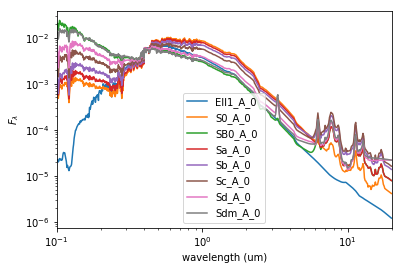

In [3]:
# some gal sed

gallibdir = '/Users/ytcheng/ciber/lephare/lephare_dev/sed/GAL/COSMOS_SED/'

name_arr = ['Ell1_A_0','S0_A_0','SB0_A_0','Sa_A_0','Sb_A_0','Sc_A_0','Sd_A_0','Sdm_A_0']

plt.figure()
for name in name_arr:
    wl_arr, f_arr = load_sed(gallibdir + name + '.sed', interp = False)
    plt.plot(wl_arr,f_arr,label = name)

plt.yscale('log')
plt.xscale('log')
plt.legend(loc=0)
plt.xlim([0.1,20])
plt.xlabel('wavelength (um)')
plt.ylabel('$F_\lambda$')

/Users/ytcheng/ciber/python/SED/sed_tools.py:22: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(filtdir + 'Hband_trans_digitize.txt', dtype=None, delimiter=',')


Text(0,0.5,'$F_\\lambda$')

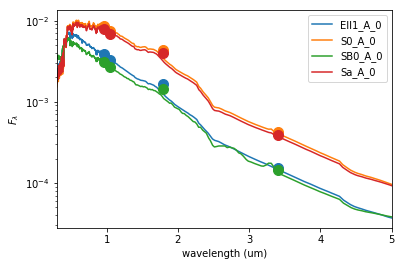

In [4]:
# filter-weighted flux

gallibdir = '/Users/ytcheng/ciber/lephare/lephare_dev/sed/GAL/COSMOS_SED/'

name_arr = ['Ell1_A_0','S0_A_0','SB0_A_0','Sa_A_0']

bands = [0.9633, 1.05,1.79,3.4]

plt.figure()
ax = plt.gca()
for name in name_arr:
    wl_arr, f_arr = load_sed(gallibdir + name + '.sed', interp = True, interp_lim=[0.3,5])

    _, T_arr = panstarrs_filter('y', interp = True, interp_lim=[0.3,5])
    F_y = np.sum(f_arr * T_arr) / np.sum(T_arr)
    _, T_arr = ciber_filter('I', interp = True, interp_lim=[0.3,5])
    F_I = np.sum(f_arr * T_arr) / np.sum(T_arr)
    _, T_arr = ciber_filter('H', interp = True, interp_lim=[0.3,5])
    F_H = np.sum(f_arr * T_arr) / np.sum(T_arr)
    _, T_arr = wise_filter('w1', interp = True, interp_lim=[0.3,5])
    F_w1 = np.sum(f_arr * T_arr) / np.sum(T_arr)
    
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(wl_arr,f_arr,label = name, color = color)
    plt.plot(bands,[F_y,F_I,F_H,F_w1],'o', color = color, markersize = 10)
    
plt.yscale('log')
#plt.xscale('log')
plt.legend(loc=0)
plt.xlim([0.3,5])
plt.xlabel('wavelength (um)')
plt.ylabel('$F_\lambda$')

/Users/ytcheng/ciber/python/SED/sed_tools.py:22: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(filtdir + 'Hband_trans_digitize.txt', dtype=None, delimiter=',')


Text(0,0.5,'$m_{AB}$')

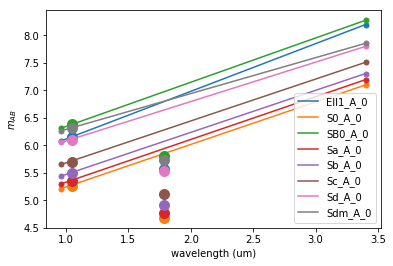

In [5]:
# filter-weighted flux

gallibdir = '/Users/ytcheng/ciber/lephare/lephare_dev/sed/GAL/COSMOS_SED/'

name_arr = ['Ell1_A_0','S0_A_0','SB0_A_0','Sa_A_0','Sb_A_0','Sc_A_0','Sd_A_0','Sdm_A_0']

bands = np.asarray([0.9633, 1.05, 1.79, 3.4])

plt.figure()
ax = plt.gca()
for name in name_arr:
    wl_arr, f_arr = load_sed(gallibdir + name + '.sed', interp = True, interp_lim=[0.3,5])

    _, T_arr = panstarrs_filter('y', interp = True, interp_lim=[0.3,5])
    F_y = np.sum(f_arr * T_arr) / np.sum(T_arr)
    _, T_arr = ciber_filter('I', interp = True, interp_lim=[0.3,5])
    F_I = np.sum(f_arr * T_arr) / np.sum(T_arr)
    _, T_arr = ciber_filter('H', interp = True, interp_lim=[0.3,5])
    F_H = np.sum(f_arr * T_arr) / np.sum(T_arr)
    _, T_arr = wise_filter('w1', interp = True, interp_lim=[0.3,5])
    F_w1 = np.sum(f_arr * T_arr) / np.sum(T_arr)
    
    Flmda_arr = np.asarray([F_y,F_I,F_I,F_w1])
    Fnu_arr = Flmda_arr * bands
    m_arr = -2.5 * np.log10(Fnu_arr)
    
    color = next(ax._get_lines.prop_cycler)['color']
    plt.plot(bands[[0,-1]],m_arr[[0,-1]],'-',color = color, markersize = 10, label = name)
    plt.plot(bands[[0,-1]],m_arr[[0,-1]],'.',color = color, markersize = 10)
    plt.plot(bands[[1,2]],m_arr[[1,2]],'o', color = color, markersize = 10)
    
plt.legend(loc=0)
plt.xlabel('wavelength (um)')
plt.ylabel('$m_{AB}$')

# galaxy SED scaling in a range of z

/Users/ytcheng/ciber/python/SED/sed_tools.py:22: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(filtdir + 'Hband_trans_digitize.txt', dtype=None, delimiter=',')


Text(0.5,1,'bands magnitude')

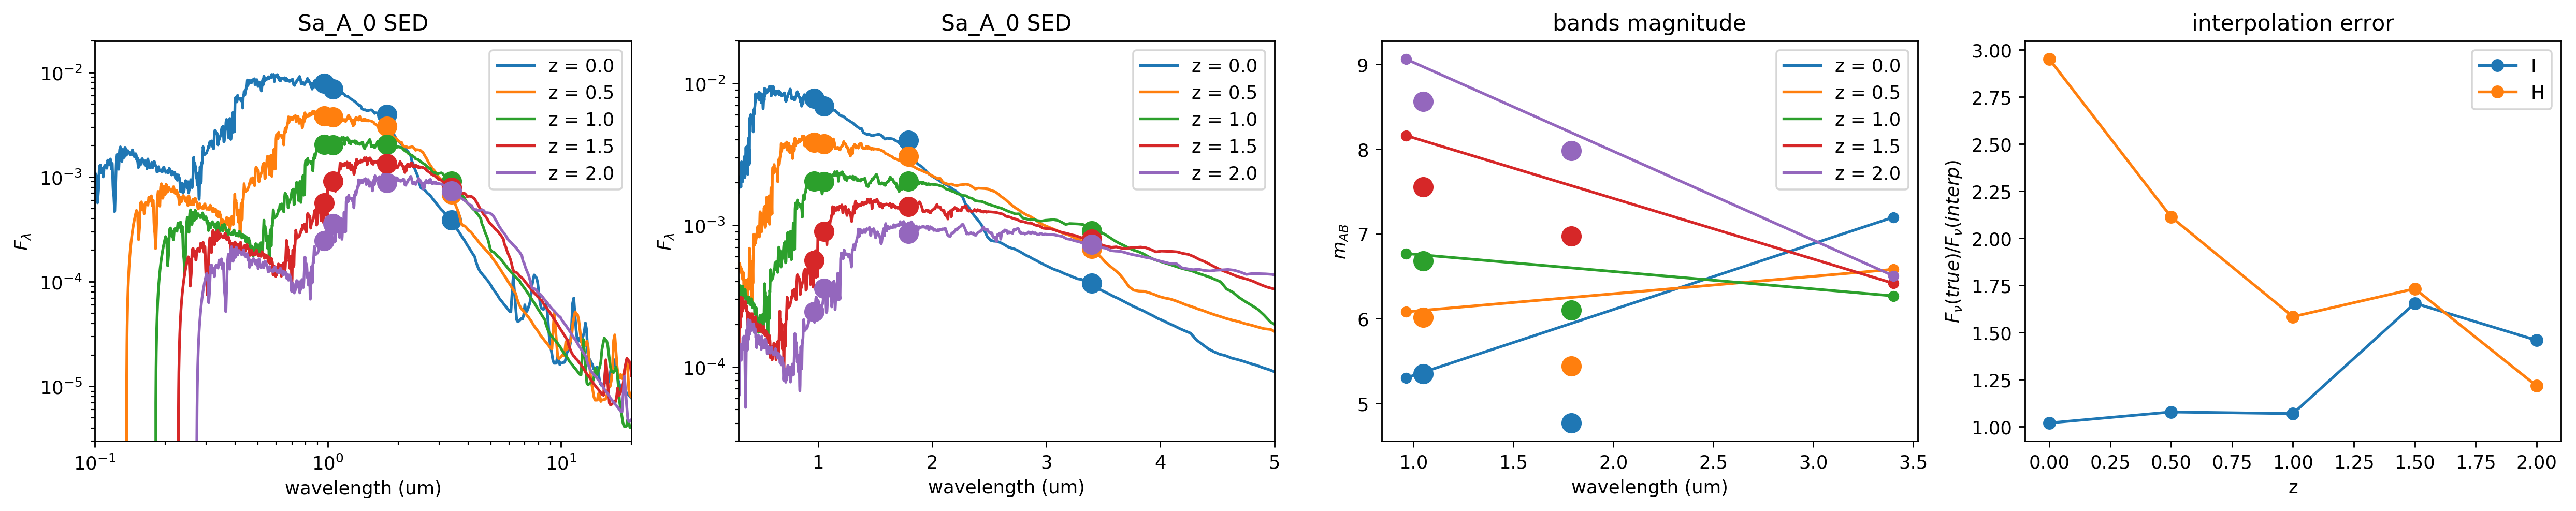

In [6]:
# plot one SED and the z evolution
from sed_tools import *
gallibdir = '/Users/ytcheng/ciber/lephare/lephare_dev/sed/GAL/COSMOS_SED/'

bands = np.asarray([0.9633, 1.05, 1.79, 3.4])

name = 'Sa_A_0'
interp_lim = [0.3,5]
z_arr = np.arange(0,2.1,0.5)

_, Ty_arr = panstarrs_filter('y', interp = True, interp_lim=interp_lim)
_, TI_arr = ciber_filter('I', interp = True, interp_lim=interp_lim)
_, TH_arr = ciber_filter('H', interp = True, interp_lim=interp_lim)
_, Tw1_arr = wise_filter('w1', interp = True, interp_lim=interp_lim)

fig, ax = plt.subplots(1,4,figsize=(24,4), dpi=256)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
rI_arr = np.zeros_like(z_arr)
rH_arr = np.zeros_like(z_arr)
for i,z in enumerate(z_arr):
    wl_arr, f_arr = load_sed(gallibdir + name + '.sed', interp = False, z = z)
    ax[0].plot(wl_arr,f_arr, color = colors[i], label = 'z = ' + str(z))
    ax[1].plot(wl_arr,f_arr, color = colors[i], label = 'z = ' + str(z))

    wl_arr, f_arr = load_sed(gallibdir + name + '.sed', interp = True, z = z, interp_lim = interp_lim)
    F_y = np.sum(f_arr * Ty_arr) / np.sum(Ty_arr)
    F_I = np.sum(f_arr * TI_arr) / np.sum(TI_arr)
    F_H = np.sum(f_arr * TH_arr) / np.sum(TH_arr)
    F_w1 = np.sum(f_arr * Tw1_arr) / np.sum(Tw1_arr)
    
    ax[0].plot(bands,[F_y,F_I,F_H,F_w1],'o', color = colors[i], markersize = 10)
    ax[1].plot(bands,[F_y,F_I,F_H,F_w1],'o', color = colors[i], markersize = 10)

    Flmda_arr = np.asarray([F_y,F_I,F_I,F_w1])
    Fnu_arr = Flmda_arr * bands
    m_arr = -2.5 * np.log10(Fnu_arr)

    ax[2].plot(bands[[0,-1]],m_arr[[0,-1]],'-', color = colors[i], markersize = 10, label = 'z = ' + str(z))
    ax[2].plot(bands[[0,-1]],m_arr[[0,-1]],'.', color = colors[i], markersize = 10)
    ax[2].plot(bands[[1,2]],m_arr[[1,2]],'o', color = colors[i], markersize = 10)
    
    # Fnu(interpolated) / Fnu(true)
    rI_arr[i] = 10**((np.interp(bands[1], bands[[0,-1]], m_arr[[0,-1]]) - m_arr[1])/2.5)
    rH_arr[i] = 10**((np.interp(bands[2], bands[[0,-1]], m_arr[[0,-1]]) - m_arr[2])/2.5)
    
ax[3].plot(z_arr,rI_arr, 'o-', label = 'I')
ax[3].plot(z_arr,rH_arr, 'o-', label = 'H')
ax[3].set_xlabel('z')
ax[3].set_ylabel(r'$F_\nu (true) / F_\nu (interp)$')
ax[3].set_title('interpolation error')
ax[3].legend(loc=0)

ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].legend(loc=0)
ax[0].set_xlim([0.1,20])
ax[0].set_ylim([3e-6,2e-2])
ax[0].set_xlabel('wavelength (um)')
ax[0].set_ylabel('$F_\lambda$')
ax[0].set_title(name + ' SED')

ax[1].set_yscale('log')
ax[1].legend(loc=0)
ax[1].set_xlim([0.3,5])
ax[1].set_ylim([3e-5,2e-2])
ax[1].set_xlabel('wavelength (um)')
ax[1].set_ylabel('$F_\lambda$')
ax[1].set_title(name + ' SED')

ax[2].legend(loc=0)
ax[2].set_xlabel('wavelength (um)')
ax[2].set_ylabel('$m_{AB}$')
ax[2].set_title('bands magnitude')

/Users/ytcheng/ciber/python/SED/sed_tools.py:22: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(filtdir + 'Hband_trans_digitize.txt', dtype=None, delimiter=',')


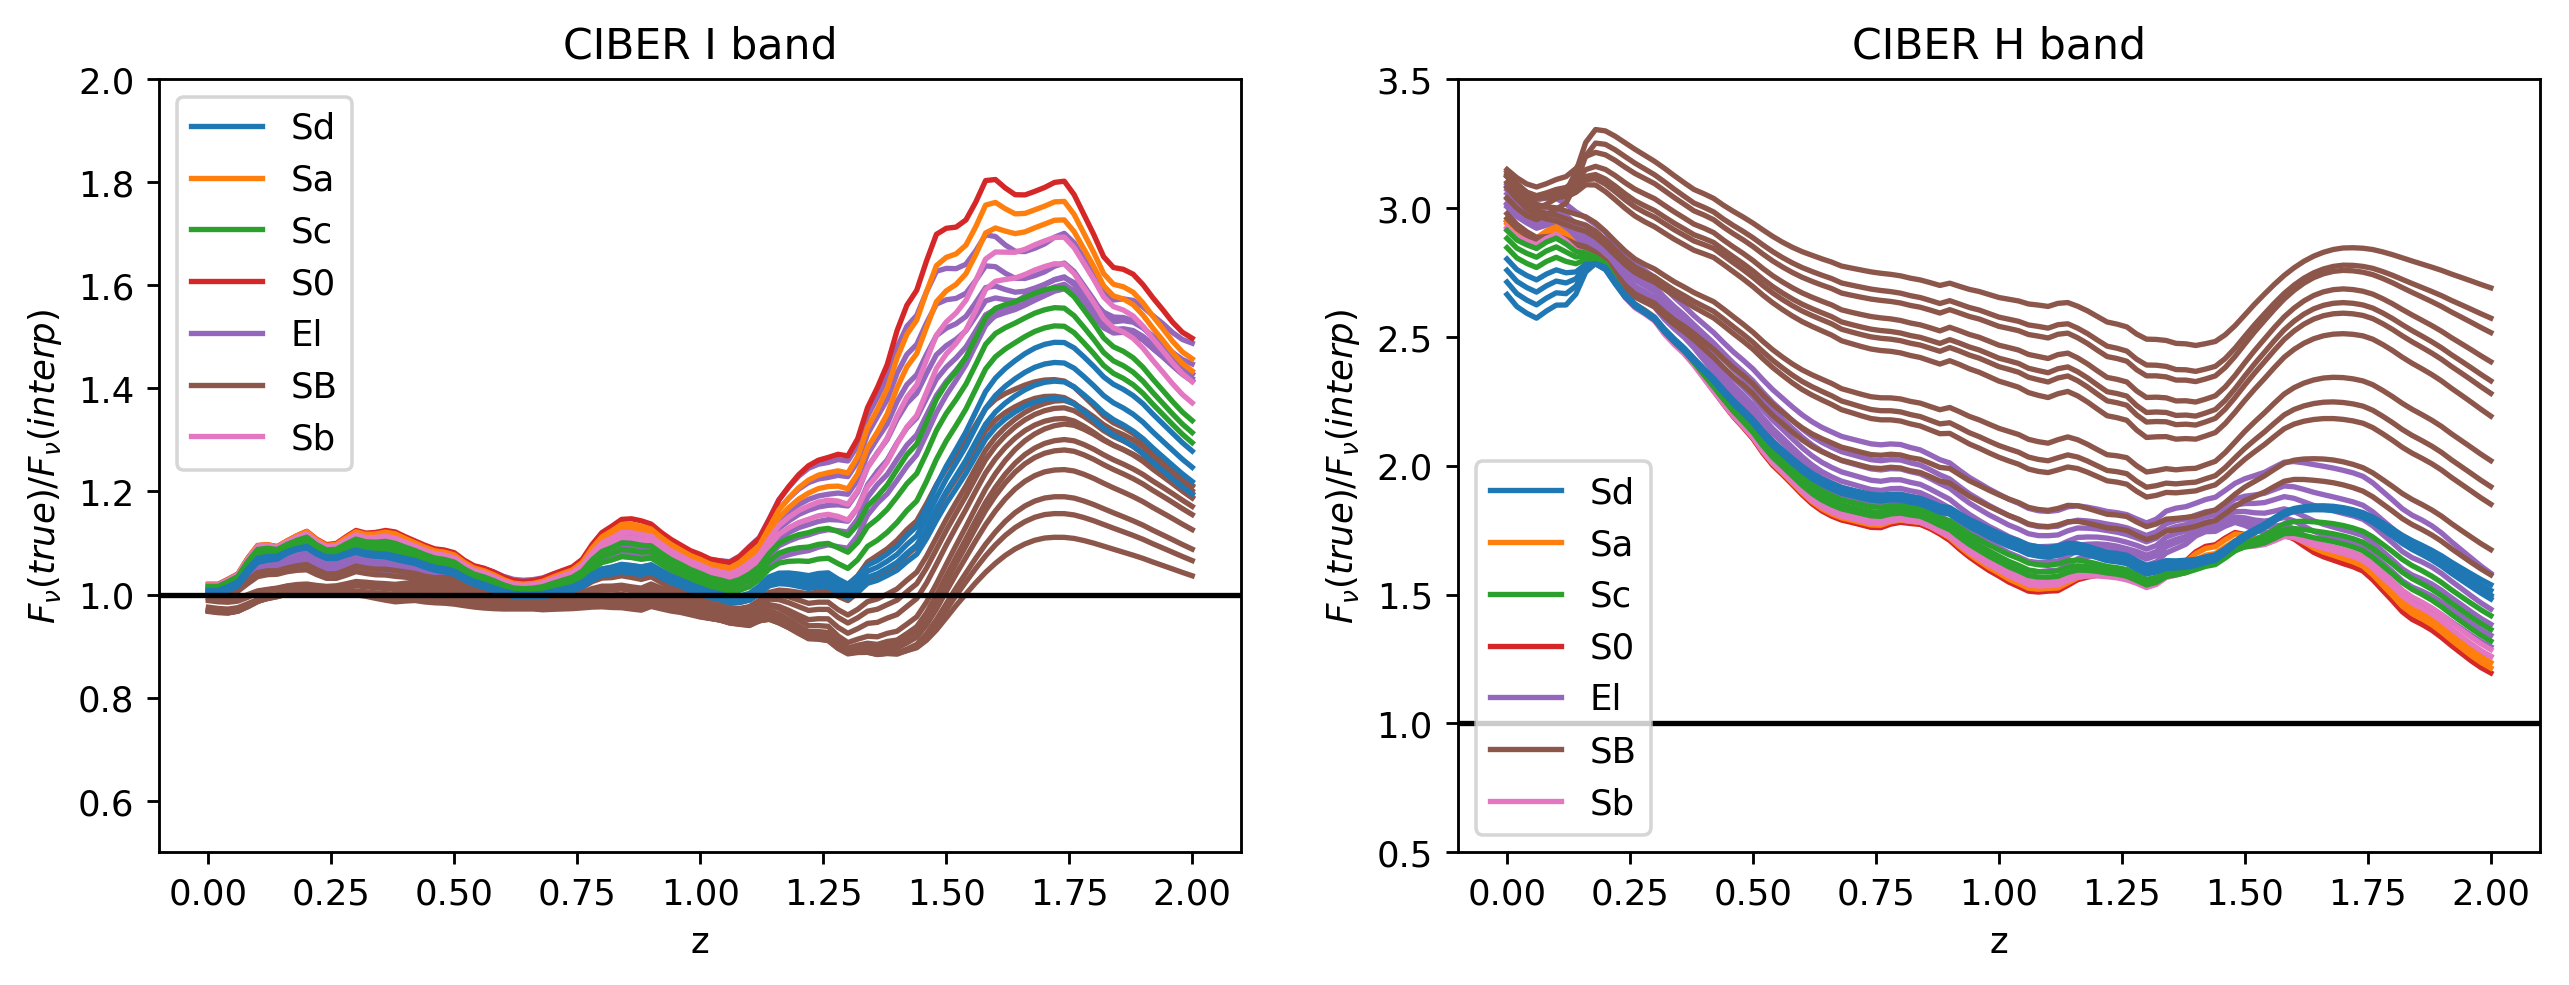

In [7]:
# get list of SED names
from sed_tools import *
import glob
gallibdir = '/Users/ytcheng/ciber/lephare/lephare_dev/sed/GAL/COSMOS_SED/'
seds_all = glob.glob(gallibdir +"*.sed")
sed_names = [s for s in seds_all if "nodust" not in s]
sed_types = np.array([s[60:62] for s in sed_names])
sed_types_dict = np.array(list(set(sed_types)))


interp_lim = [0.3,5]
z_arr = np.arange(0,2.0001,0.02)
bands = np.asarray([0.9633, 1.05, 1.79, 3.4])

_, Ty_arr = panstarrs_filter('y', interp = True, interp_lim=interp_lim)
_, TI_arr = ciber_filter('I', interp = True, interp_lim=interp_lim)
_, TH_arr = ciber_filter('H', interp = True, interp_lim=interp_lim)
_, Tw1_arr = wise_filter('w1', interp = True, interp_lim=interp_lim)

fig, ax = plt.subplots(1,2,figsize=(12,4), dpi = 256)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for iname,name in enumerate(sed_names):
    type_idx = np.where(sed_types[iname] == np.array(list(set(sed_types_dict))))[0][0]

    rI_arr = np.zeros_like(z_arr)
    rH_arr = np.zeros_like(z_arr)
    for iz,z in enumerate(z_arr):
        wl_arr, f_arr = load_sed(name, interp = True, z = z, interp_lim = interp_lim)
        F_y = np.sum(f_arr * Ty_arr) / np.sum(Ty_arr)
        F_I = np.sum(f_arr * TI_arr) / np.sum(TI_arr)
        F_H = np.sum(f_arr * TH_arr) / np.sum(TH_arr)
        F_w1 = np.sum(f_arr * Tw1_arr) / np.sum(Tw1_arr)

        Flmda_arr = np.asarray([F_y,F_I,F_I,F_w1])
        Fnu_arr = Flmda_arr * bands
        m_arr = -2.5 * np.log10(Fnu_arr)

        # Fnu(interpolated) / Fnu(true)
        rI_arr[iz] = 10**((np.interp(bands[1], bands[[0,-1]], m_arr[[0,-1]]) - m_arr[1])/2.5)
        rH_arr[iz] = 10**((np.interp(bands[2], bands[[0,-1]], m_arr[[0,-1]]) - m_arr[2])/2.5)

    ax[0].plot(z_arr,rI_arr, '-', c = colors[type_idx], markersize = 2)
    ax[1].plot(z_arr,rH_arr, '-', c = colors[type_idx], markersize = 2)

# for legend
for i,name in enumerate(sed_types_dict):
    ax[0].plot(z_arr,-1*np.ones_like(z_arr), '-', c = colors[i], markersize = 2, label = name)
    ax[1].plot(z_arr,-1*np.ones_like(z_arr), '-', c = colors[i], markersize = 2, label = name)

ax[0].set_xlabel('z')
ax[0].set_ylabel(r'$F_\nu (true) / F_\nu (interp)$')
ax[0].set_title('CIBER I band')
ax[0].set_ylim([0.5,2])
ax[0].axhline(1,color = 'k')
ax[0].legend(loc = 0)
ax[1].set_xlabel('z')
ax[1].set_ylabel(r'$F_\nu (true) / F_\nu (interp)$')
ax[1].set_title('CIBER H band')
ax[1].set_ylim([0.5,3.5])
ax[1].axhline(1,color = 'k')
ax[1].legend(loc = 0)

In [8]:
# get list of SED names
from sed_tools import *
import glob
gallibdir = '/Users/ytcheng/ciber/lephare/lephare_dev/sed/GAL/COSMOS_SED/'
seds_all = glob.glob(gallibdir +"*.sed")
sed_names = [s for s in seds_all if "nodust" not in s]
sed_types = np.array([s[60:62] for s in sed_names])
sed_types_dict = np.array(list(set(sed_types)))


interp_lim = [0.3,5]
z_arr = np.arange(0,2.0001,0.02)
bands = np.asarray([0.9633, 1.05, 1.79, 3.4])

_, Ty_arr = panstarrs_filter('y', interp = True, interp_lim=interp_lim)
_, TI_arr = ciber_filter('I', interp = True, interp_lim=interp_lim)
_, TH_arr = ciber_filter('H', interp = True, interp_lim=interp_lim)
_, Tw1_arr = wise_filter('w1', interp = True, interp_lim=interp_lim)

rI_arr = np.zeros([len(sed_names),len(z_arr)])
rH_arr = np.zeros([len(sed_names),len(z_arr)])
for iname,name in enumerate(sed_names):
    type_idx = np.where(sed_types[iname] == np.array(list(set(sed_types_dict))))[0][0]

    rI_vec = np.zeros_like(z_arr)
    rH_vec = np.zeros_like(z_arr)
    for iz,z in enumerate(z_arr):
        wl_arr, f_arr = load_sed(name, interp = True, z = z, interp_lim = interp_lim)
        F_y = np.sum(f_arr * Ty_arr) / np.sum(Ty_arr)
        F_I = np.sum(f_arr * TI_arr) / np.sum(TI_arr)
        F_H = np.sum(f_arr * TH_arr) / np.sum(TH_arr)
        F_w1 = np.sum(f_arr * Tw1_arr) / np.sum(Tw1_arr)

        Flmda_arr = np.asarray([F_y,F_I,F_I,F_w1])
        Fnu_arr = Flmda_arr * bands
        m_arr = -2.5 * np.log10(Fnu_arr)

        # Fnu(interpolated) / Fnu(true)
        rI_vec[iz] = 10**((np.interp(bands[1], bands[[0,-1]], m_arr[[0,-1]]) - m_arr[1])/2.5)
        rH_vec[iz] = 10**((np.interp(bands[2], bands[[0,-1]], m_arr[[0,-1]]) - m_arr[2])/2.5)
    
    rI_arr[iname,:] = rI_vec
    rH_arr[iname,:] = rH_vec

/Users/ytcheng/ciber/python/SED/sed_tools.py:22: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  data = np.genfromtxt(filtdir + 'Hband_trans_digitize.txt', dtype=None, delimiter=',')


In [9]:
midI = np.mean([np.min(rI_arr),np.max(rI_arr)])
midH = np.mean([np.min(rH_arr),np.max(rH_arr)])
print('I band ratio range : [%.2f, %.2f], [%.2f +- %.2f]'\
      %(np.min(rI_arr),np.max(rI_arr),midI,midI - np.min(rI_arr)))
print('H band ratio range : [%.2f, %.2f], [%.2f +- %.2f]'\
      %(np.min(rH_arr),np.max(rH_arr),midH,midH - np.min(rH_arr)))

I band ratio range : [0.88, 1.81], [1.34 +- 0.46]
H band ratio range : [1.20, 3.30], [2.25 +- 1.05]


In [10]:
0.88**2,1.34**2,1.81**2,1.2**2,2.25**2,3.3**2

(0.7744, 1.7956000000000003, 3.2761, 1.44, 5.0625, 10.889999999999999)

In [19]:
rI1_arr = rI_arr[:,z_arr<1]
rH1_arr = rH_arr[:,z_arr<1]

midI = np.mean([np.min(rI1_arr),np.max(rI1_arr)])
midH = np.mean([np.min(rH1_arr),np.max(rH1_arr)])
print('I band ratio range : [%.2f, %.2f], [%.2f +- %.2f]'\
      %(np.min(rI1_arr),np.max(rI1_arr),midI,midI - np.min(rI1_arr)))
print('H band ratio range : [%.2f, %.2f], [%.2f +- %.2f]'\
      %(np.min(rH1_arr),np.max(rH1_arr),midH,midH - np.min(rH1_arr)))

I band ratio range : [0.96, 1.15], [1.05 +- 0.09]
H band ratio range : [1.59, 3.30], [2.45 +- 0.86]
